In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
Image_size=256
Batch_size=32
Channels=3
Epochs=35

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\vishnu\Potato Disease Classification\PlantVillage",  # Use raw string (r"")
    shuffle=True,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size
)


Found 2152 files belonging to 3 classes.


In [9]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 1 1 1 1 1 0 1 1 1 1 2 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0]


In [15]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[177. 180. 187.]
  [171. 174. 181.]
  [170. 173. 180.]
  ...
  [148. 152. 164.]
  [151. 155. 167.]
  [153. 157. 169.]]

 [[176. 179. 186.]
  [171. 174. 181.]
  [170. 173. 180.]
  ...
  [151. 155. 167.]
  [153. 157. 169.]
  [154. 158. 170.]]

 [[175. 178. 185.]
  [171. 174. 181.]
  [170. 173. 180.]
  ...
  [152. 156. 168.]
  [152. 156. 168.]
  [152. 156. 168.]]

 ...

 [[137. 136. 141.]
  [132. 131. 136.]
  [144. 143. 148.]
  ...
  [ 93.  96. 101.]
  [ 91.  94.  99.]
  [ 91.  95.  98.]]

 [[133. 132. 137.]
  [140. 139. 144.]
  [144. 143. 148.]
  ...
  [ 92.  95. 100.]
  [ 89.  92.  97.]
  [ 91.  95.  98.]]

 [[121. 120. 125.]
  [143. 142. 147.]
  [143. 142. 147.]
  ...
  [ 93.  96. 101.]
  [ 92.  95. 100.]
  [ 97. 101. 104.]]], shape=(256, 256, 3), dtype=float32)


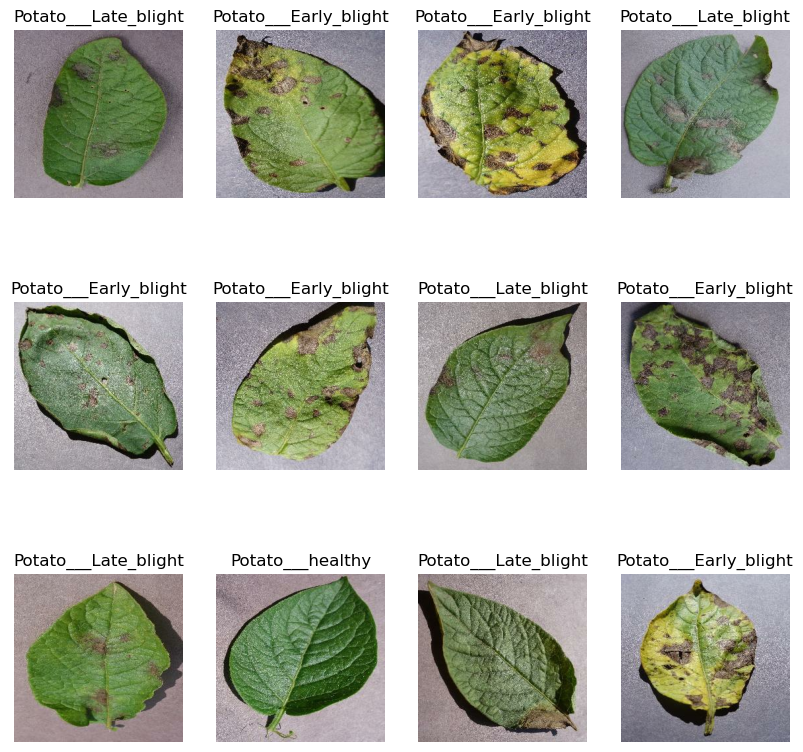

In [12]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
image_count=len(dataset)
image_count

68

In [14]:
train_size=int(image_count*0.8)
train_ds=dataset.take(train_size)
test_ds=dataset.skip(train_size)

In [15]:
print(len(train_ds))
print(len(test_ds))

54
14


In [16]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

54

In [23]:
len(test_ds)

8

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size, Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])


In [29]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [33]:
for image, label in train_ds.take(1):
    print(image.shape)

(32, 256, 256, 3)


In [85]:
input_shape=(Batch_size,Image_size,Image_size,Channels)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation="softmax"),

])
model.build(input_shape=input_shape)

C:\Users\Vishnu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [100]:
history=model.fit(
    train_ds,
    epochs=Epochsa
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9267 - loss: 0.1704 - val_accuracy: 0.8750 - val_loss: 0.3322
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9312 - loss: 0.1802 - val_accuracy: 0.9167 - val_loss: 0.2583
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9310 - loss: 0.1654 - val_accuracy: 0.9427 - val_loss: 0.1576
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9529 - loss: 0.1107 - val_accuracy: 0.9062 - val_loss: 0.2530
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9479 - loss: 0.1380 - val_accuracy: 0.8594 - val_loss: 0.4324
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9790 - loss: 0.0809 - val_accuracy: 0.9271 - val_loss: 0.3202
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9675 - loss: 0.1025 - val_accuracy: 0.9688 - val_loss: 0.1293
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9556 - loss: 0.1258 - val_accuracy: 0.9062 - val_loss:

In [102]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.9677 - loss: 0.0848


In [104]:
scores

[0.055817559361457825, 0.9765625]

In [106]:
history

In [108]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

In [110]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [114]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

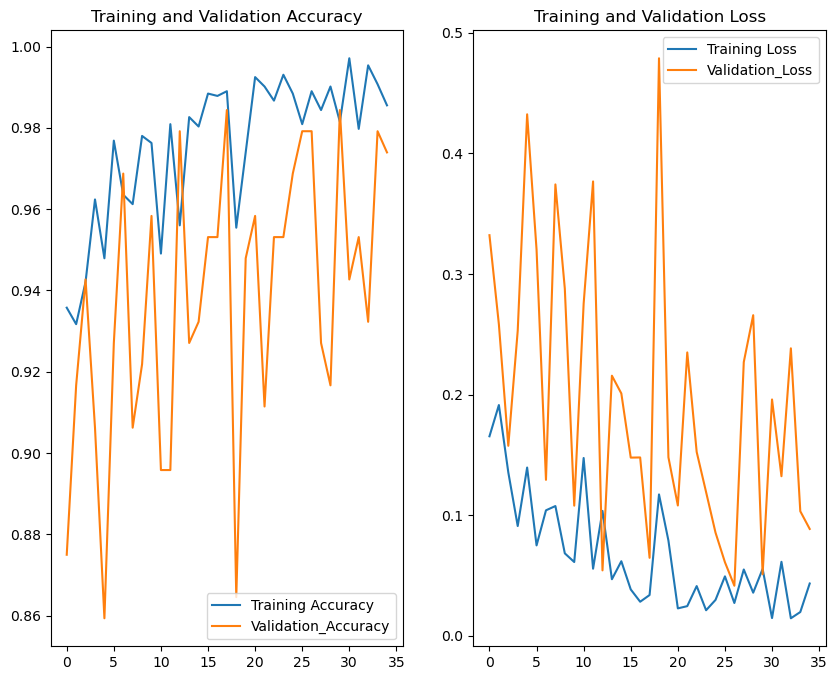

In [132]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training Accuracy')
plt.plot(range(Epochs),val_acc,label="Validation_Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training Loss')
plt.plot(range(Epochs),val_loss,label="Validation_Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

[[[198 180 176]
  [191 173 169]
  [191 173 169]
  ...
  [171 153 153]
  [146 128 128]
  [192 174 174]]

 [[189 171 167]
  [187 169 165]
  [191 173 169]
  ...
  [174 156 156]
  [178 160 160]
  [137 119 119]]

 [[195 177 173]
  [198 180 176]
  [200 182 178]
  ...
  [143 125 125]
  [164 146 146]
  [166 148 148]]

 ...

 [[155 127 124]
  [143 115 112]
  [153 125 122]
  ...
  [101  72  74]
  [115  86  88]
  [124  95  97]]

 [[139 111 108]
  [117  89  86]
  [140 112 109]
  ...
  [105  76  78]
  [108  79  81]
  [116  87  89]]

 [[118  90  87]
  [125  97  94]
  [158 130 127]
  ...
  [106  77  79]
  [118  89  91]
  [103  74  76]]]


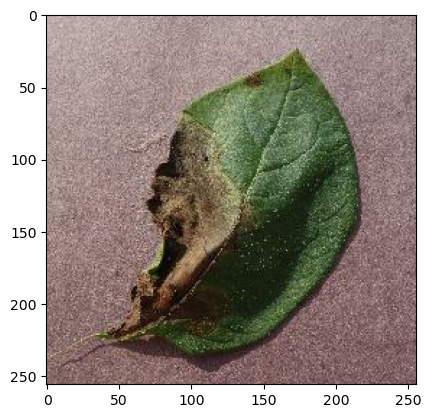

In [138]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))
    plt.imshow(images_batch[0].numpy().astype('uint8'))

First Image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicted label: Potato___Late_blight


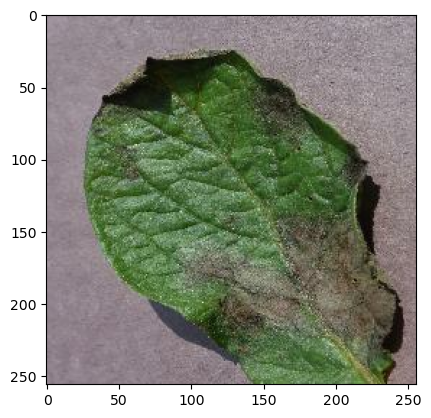

In [153]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [155]:
def predict(model,img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


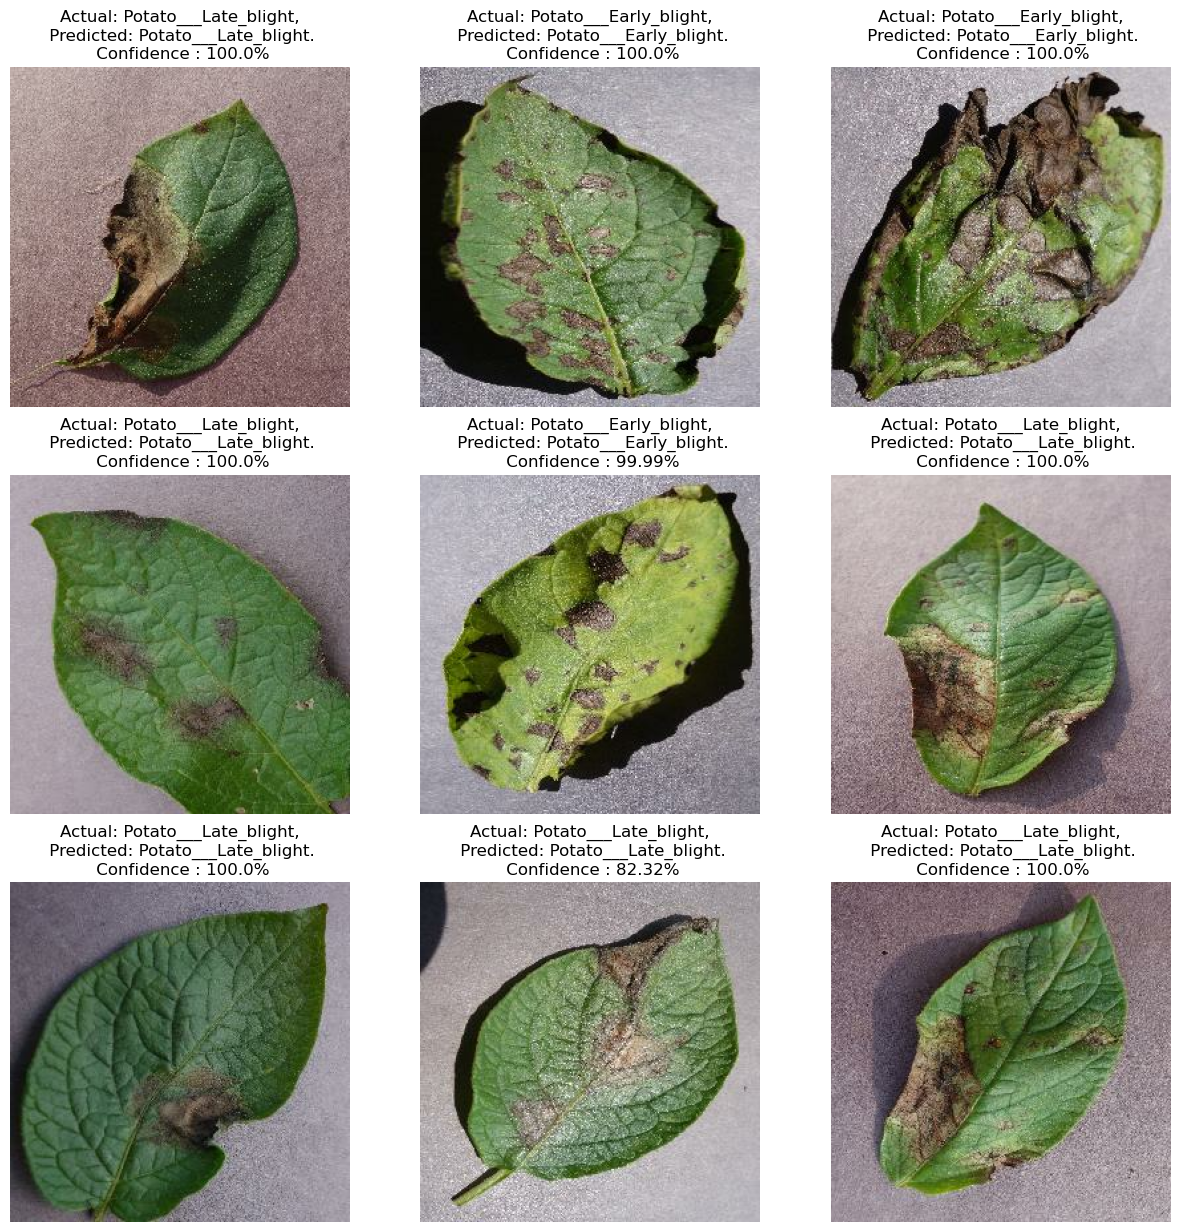

In [171]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class= class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence : {confidence}%")
        plt.axis("off")

In [203]:
model_version = 1
model.save(fr"D:\vishnu\Potato Disease Classification\Saved_models\model_v{model_version}.h5")


In [201]:
import os
print(os.path.exists(r"D:\vishnu\Potato Disease Classification\Saved_models"))

#D:\vishnu\Potato Disease Classification\Saved_models


True


In [195]:
[int(i) for i in os.listdir(r"D:\vishnu\Potato Disease Classification\Saved_models") if i.isdigit()]


[]

In [1]:
pip install kolmogorov-arnold-network


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kolmogorov-arnold-network (from versions: none)
ERROR: No matching distribution found for kolmogorov-arnold-network


In [31]:
import tensorflow as tf
from tensorflow.keras import layers

class KANLayer(layers.Layer):
    def __init__(self, units=64, activation="relu"):
        super(KANLayer, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        # Define learnable coefficients for a polynomial function (KAN uses function approximation)
        self.coefficients = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.bias = self.add_weight(
            shape=(self.units,),
            initializer="zeros",
            trainable=True,
        )

    def call(self, inputs):
        # Apply a polynomial transformation (simplified KAN approach)
        x = tf.matmul(inputs, self.coefficients) + self.bias
        return self.activation(x)


In [33]:
input_shape = (Batch_size, Image_size, Image_size, Channels)
n_classes = 3

model2 = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    # KAN Layers replacing Conv2D layers
    KANLayer(units=64, activation='relu'),  # Learnable transformation
    KANLayer(units=64, activation='relu'),
    KANLayer(units=64, activation='relu'),
    KANLayer(units=64, activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])


In [35]:
# Build & Compile the model
model2.build(input_shape=input_shape)
model2.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [37]:
# Train the model
Epochs=20
history = model2.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 725s 13s/step - accuracy: 0.4634 - loss: 1.0416 - val_accuracy: 0.4792 - val_loss: 0.8411
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.6911 - loss: 0.7509 - val_accuracy: 0.8490 - val_loss: 0.4720
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.7981 - loss: 0.5122 - val_accuracy: 0.8229 - val_loss: 0.4425
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.7920 - loss: 0.4984 - val_accuracy: 0.8646 - val_loss: 0.3876
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.8439 - loss: 0.4165 - val_accuracy: 0.8698 - val_loss: 0.3554
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.8429 - loss: 0.3510 - val_accuracy: 0.8385 - val_loss: 0.3407
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.8468 - loss: 0.3506 - val_accuracy: 0.8958 - val_loss: 0.3027
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.8900 - loss: 0.2815 - val_accuracy: 0.9115 - 

In [43]:
scores=model2.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8997 - loss: 0.2715


In [45]:
scores

[0.20598535239696503, 0.91015625]

In [47]:
history

In [49]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

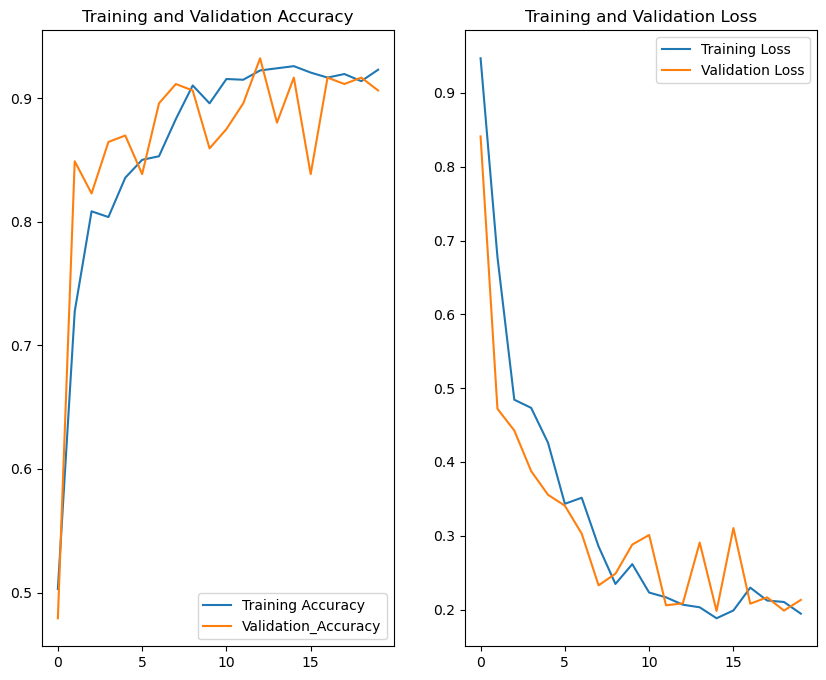

In [55]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label="Training Accuracy")
plt.plot(range(Epochs),val_acc,label="Validation_Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label="Training Loss")
plt.plot(range(Epochs),val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

[[[123 119 133]
  [ 81  77  91]
  [151 147 161]
  ...
  [165 166 184]
  [164 165 183]
  [164 165 183]]

 [[143 139 153]
  [144 140 154]
  [121 117 131]
  ...
  [167 168 186]
  [168 169 187]
  [170 171 189]]

 [[ 90  86 100]
  [140 136 150]
  [154 150 164]
  ...
  [171 172 190]
  [175 176 194]
  [178 179 197]]

 ...

 [[126 122 137]
  [137 133 148]
  [133 129 144]
  ...
  [173 175 187]
  [194 196 208]
  [201 203 215]]

 [[127 123 138]
  [129 125 140]
  [126 122 137]
  ...
  [172 174 186]
  [189 191 203]
  [188 190 202]]

 [[127 123 138]
  [123 119 134]
  [125 121 136]
  ...
  [159 161 173]
  [167 169 181]
  [155 157 169]]]


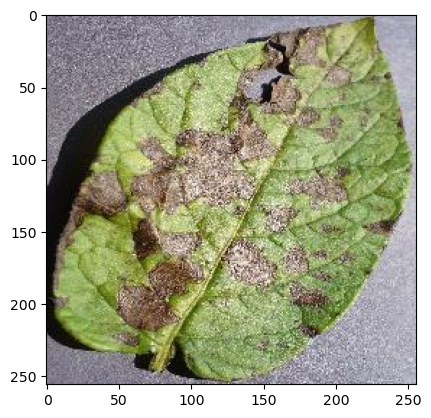

In [57]:
for image_batch,label_batch in test_ds.take(1):
    print(image_batch[0].numpy().astype("uint8"))
    plt.imshow(image_batch[0].numpy().astype('uint8'))
          

First Image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction label: Potato___Late_blight


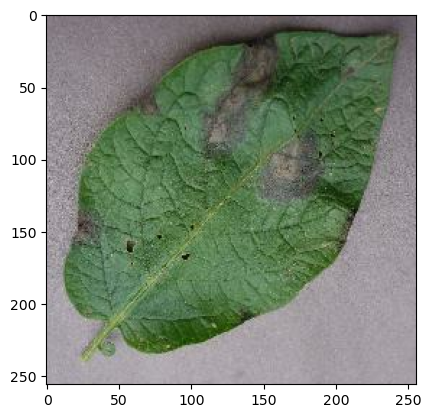

In [61]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model2.predict(image_batch)
    print("Prediction label:",class_names[np.argmax(batch_prediction[0])])

In [79]:
def predict(model2,img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array,0)

    predictions=model2.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


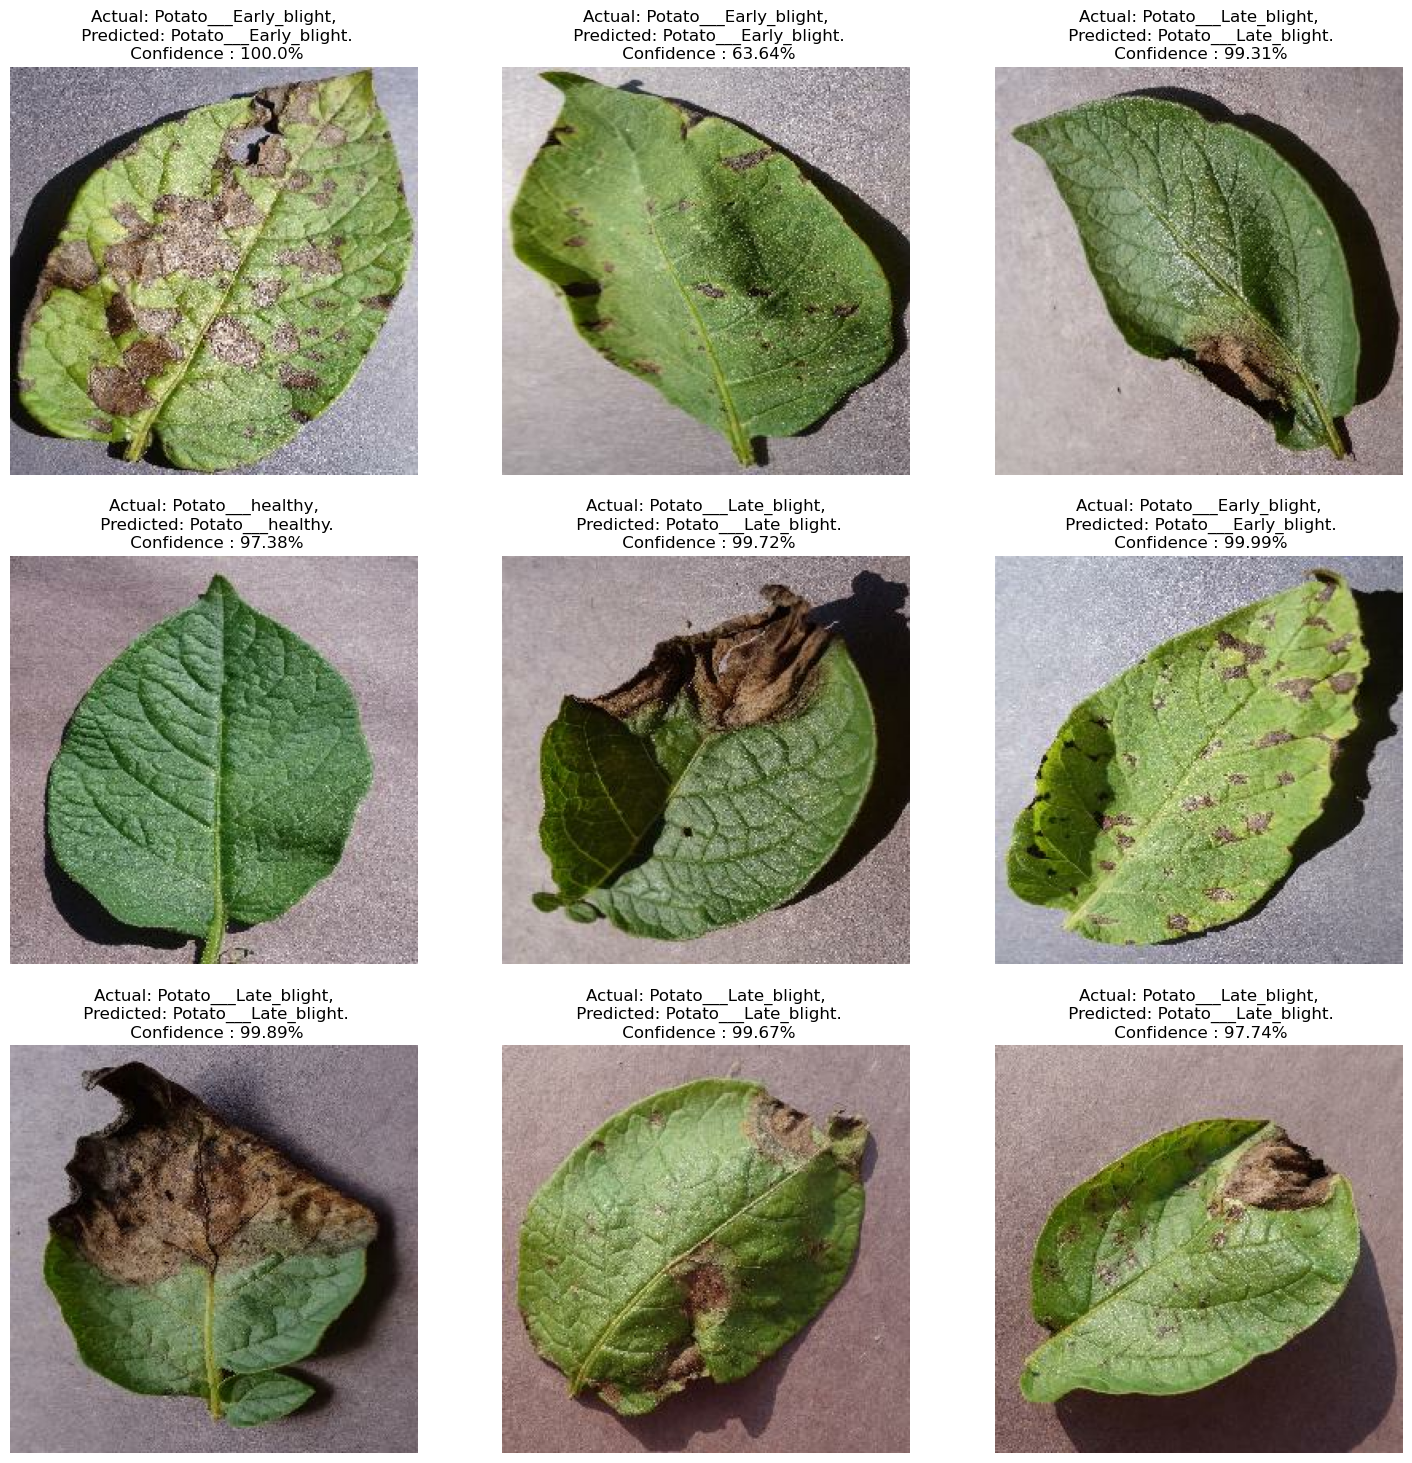

In [81]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model2,images[i].numpy())
        actual_class= class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence : {confidence}%")
        plt.axis("off")

In [85]:
model_version_potatos= 1
model2.save(fr"D:\vishnu\Potato Disease Classification\Saved_models{model_version_potatos}.h5")
